The data files are available here: https://www.kaggle.com/c/kkbox-churn-prediction-challenge/data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
user_logs= pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\user_logs.csv',nrows=10000000)
print(user_logs.shape)
print(user_logs.head())
print(user_logs.info(memory_usage='deep'))

In [ ]:
train = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\train.csv')
print(train.shape)
print(train.head())
print(train.info(memory_usage='deep'))

In [ ]:
transactions = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\transactions.csv')       
print(transactions.shape)
print(transactions.head())
print(transactions.info(memory_usage='deep'))

In [ ]:
members = pd.read_csv(r'C:\Users\liamc\OneDrive\Desktop\Data Science\KKbox\members_v3.csv')
print(members.shape)
print(members.head())
print(members.info(memory_usage='deep'))

In [6]:
#1 Can I count something interesting?
train_transactions = pd.merge(train,transactions,how='inner',on=['msno'])
train_transactions_members = pd.merge(train_transactions,members,how='inner',on=['msno'])
train_transactions_members_logs =pd.merge(train_transactions_members,user_logs,how='inner',on=['msno'])
print(train_transactions_members_logs.msno.nunique())
#So I counted that there are 780,107 unique users that appear in all 4 of these datasets when using just the first
#10 million rows of the transactions and user_logs files.

780107


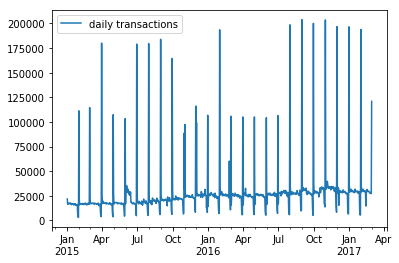

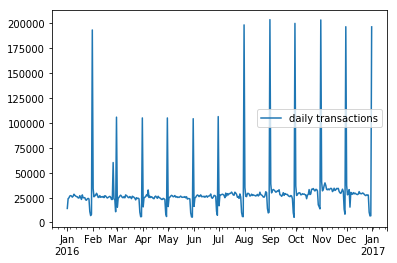

In [9]:
#2 Can I find some trends?
dateoccurrences={}
for i in transactions.transaction_date:
    if i not in dateoccurrences:
        dateoccurrences[i]=1
    dateoccurrences[i] +=1    
dateoccurrence = pd.Series(dateoccurrences)
df=pd.DataFrame(dateoccurrence,index=dateoccurrence.index)
df.index=pd.to_datetime(df.index, format='%Y%m%d')
df.columns = ['daily transactions']
df.plot()
df.loc['2016-01-01':'2016-12-31'].plot()

# I plotted the number of transaction per each day as a time series plot.  You can see how the number of transactions 
#spike at the end of each month.

Text(0.5,1,'Users Listening Behavior: Song Duration')

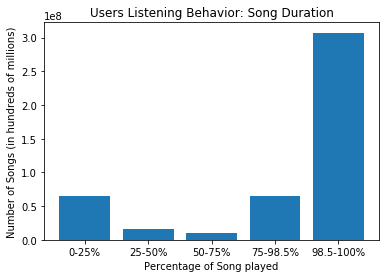

In [13]:
#3 Can I make a bar plot or histogram?
TwentyFive=user_logs.num_25.sum()
Fifty=user_logs.num_50.sum()
SeventyFive=user_logs.num_75.sum()
NinetyEightpointFive=user_logs.num_25.sum()
OneHundred=user_logs.num_100.sum()
Percentages = [TwentyFive,Fifty,SeventyFive,NinetyEightpointFive,OneHundred]
pos = np.arange(len(Percentages))
plt.bar(pos,Percentages,align='center')
labels = ['0-25%','25-50%','50-75%','75-98.5%','98.5-100%']
plt.xticks(pos,labels)
plt.ylabel('Number of Songs (in hundreds of millions)')
plt.xlabel('Percentage of Song played')
plt.title('Users Listening Behavior: Song Duration')
# Why yes I can.  This bar chart shows behavior of all users with regard to song duration.

         total_secs
count  3.062126e+06
mean   8.610017e+03
std    1.020088e+04
min    1.000000e-03
25%    2.031613e+03
50%    4.917403e+03
75%    1.091790e+04
max    8.639872e+04
         total_secs
count  3.350094e+06
mean   8.827405e+03
std    1.030426e+04
min    1.000000e-03
25%    2.095380e+03
50%    5.164442e+03
75%    1.144585e+04
max    8.639972e+04


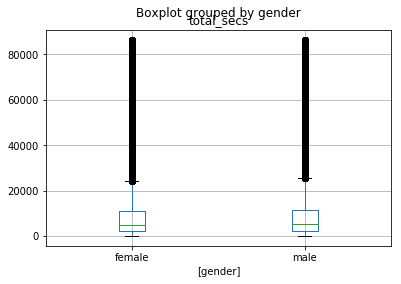

In [14]:
#4 Can I compare two related quantities?
malefemale=members[['msno','gender']]
malefemale=malefemale.dropna()
logtime=user_logs[['msno','total_secs']]
df= pd.merge(malefemale,logtime,on='msno')
df.groupby(['msno','gender'])['total_secs'].aggregate('mean')
df=df.loc[(df['total_secs']>=0) & (df['total_secs']<=86400)]
female=df.loc[df['gender']=='female']
male=df.loc[df['gender']=='male']
print(female.describe())
print(male.describe())
df.boxplot(by='gender')
#So the two quantities I wanted to compare are the average seconds of music played per day for male 
#and female users.  It turns out male users average 8,827 seconds per day and females 8,610 seconds per day.

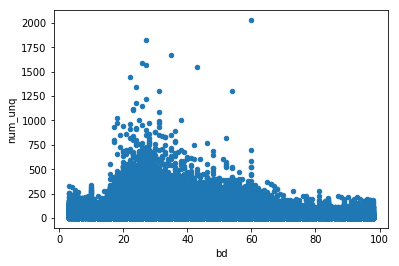

In [7]:
#5 Can I make a scatterplot?
members2=members.loc[(members['bd']>2) & (members['bd']<99)]
membage=members2[['msno','bd']]
userunq=user_logs[['msno','num_unq']]
df=pd.merge(membage,userunq,on='msno')
df.groupby(['msno','bd'])['num_unq'].aggregate('mean')
df.plot.scatter('bd','num_unq')
#it seems that most of of the variables in this data are discrete and do not make for good scatterplots but two that are nearly 
#continous and appropriate for scatterplots are the user age and average number of unique songs played per day.  
# This visualization does have problems though because with 800,000+ point most blur together and the few odd outliers are the 
#only visible.  However you can still see with the blurring there appears to be a peak around the late twenties age.

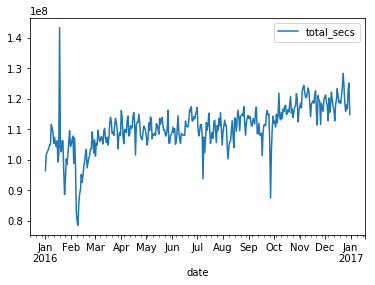

In [4]:
#6 Can I make a time-series plot?
dailys=user_logs[['date','total_secs']]
dailys=dailys.loc[dailys['total_secs']>=0]
dailys.date=pd.to_datetime(dailys['date'],format='%Y%m%d')
dailys=dailys.pivot_table(index='date',aggfunc=np.sum)
dailys.loc['2016-01-01':'2016-12-31'].plot()
# The two datafiles that included timestamps where the user logs and transactions so potential time series plot where limited 
#to that data. I decided to see what a time series plot the total daily listening time of all users would look like.